In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
%matplotlib inline

sns.set_style('darkgrid')
# sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
insurance_df = pd.read_csv('data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
insurance_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [9]:
le = LabelEncoder()

insurance_df['sex_encoder'] = le.fit_transform(insurance_df.sex)
insurance_df['smoker_encoder'] = le.fit_transform(insurance_df.smoker)
insurance_df['region_encoder'] = le.fit_transform(insurance_df.region)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoder,smoker_encoder,region_encoder
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [114]:
insurance_encoded_df = pd.get_dummies(insurance_df, columns=['smoker', 'region'])
del insurance_encoded_df['smoker_encoder']
del insurance_encoded_df['region_encoder']
insurance_encoded_df.head()

,age,sex,bmi,children,charges,sex_encoder,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,16884.92400,0,0,1,0,0,0,1
1,18,male,33.770,1,1725.55230,1,1,0,0,0,1,0
2,28,male,33.000,3,4449.46200,1,1,0,0,0,1,0
3,33,male,22.705,0,21984.47061,1,1,0,0,1,0,0
4,32,male,28.880,0,3866.85520,1,1,0,0,1,0,0


C:\Users\erik1\AppData\Local\Temp\ipykernel_11612\2863038454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_df.corr(),


<AxesSubplot: >

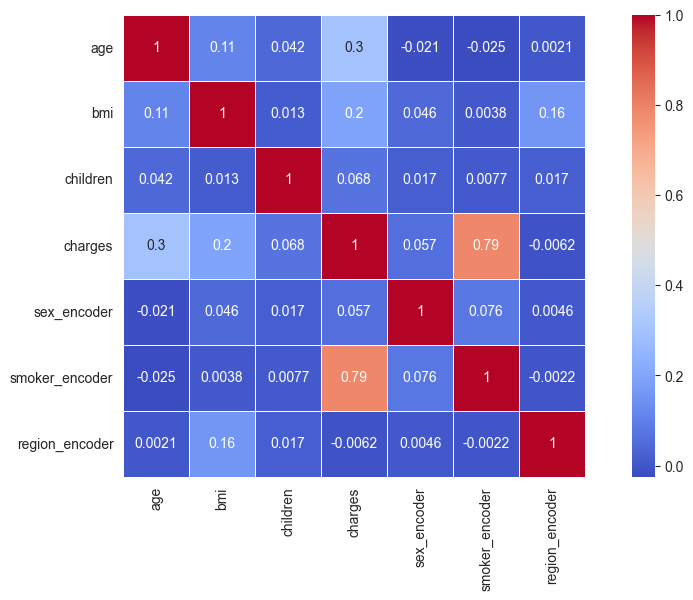

In [10]:
sns.heatmap(
    insurance_df.corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
)

In [11]:
insurance_df.describe()

,age,bmi,children,charges,sex_encoder,smoker_encoder,region_encoder
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


# Analisis de las variables

## age

In [12]:
insurance_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

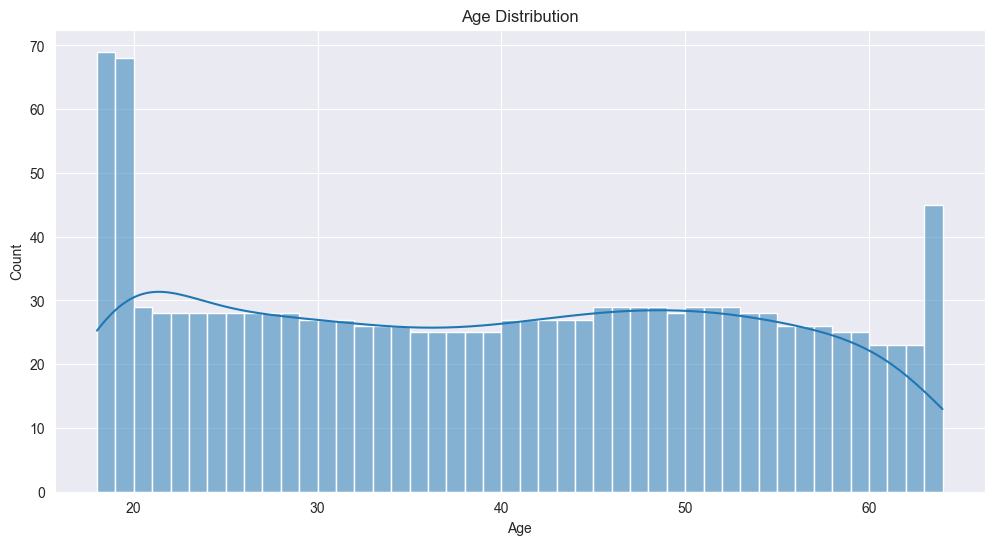

In [13]:
sns.histplot(
    insurance_df.age,
    # bins=20,
    binwidth=1,
    kde=True,
    # palette='Set2',
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

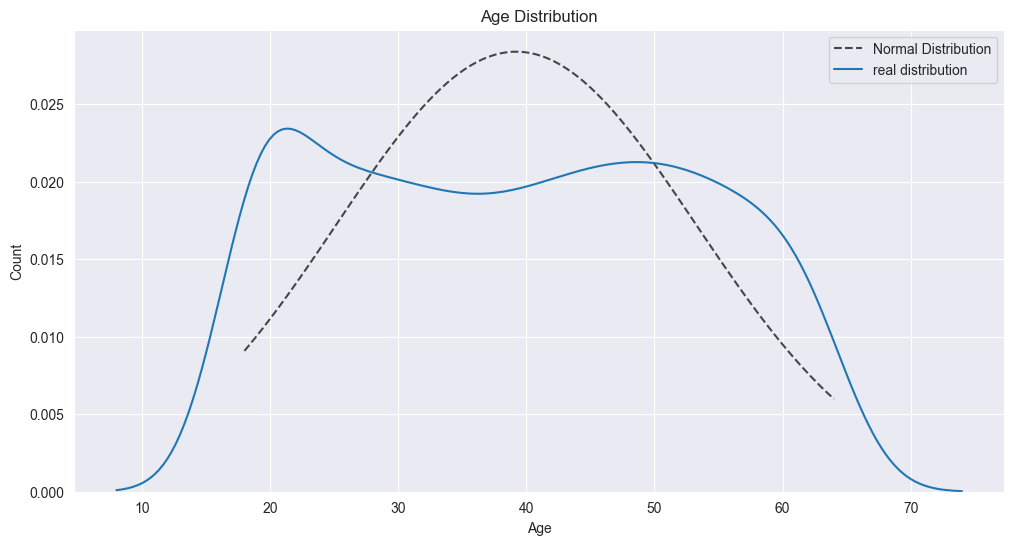

In [14]:
xs = np.linspace(insurance_df.age.min(), insurance_df.age.max(), 100)
ys = stats.norm.pdf(xs, insurance_df.age.mean(), insurance_df.age.std())

plt.plot(
    xs,
    ys,
    color='black',
    label='Normal Distribution',
    linestyle='--',
    alpha=0.7,
)

sns.kdeplot(
    insurance_df.age,
    label='real distribution',
)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

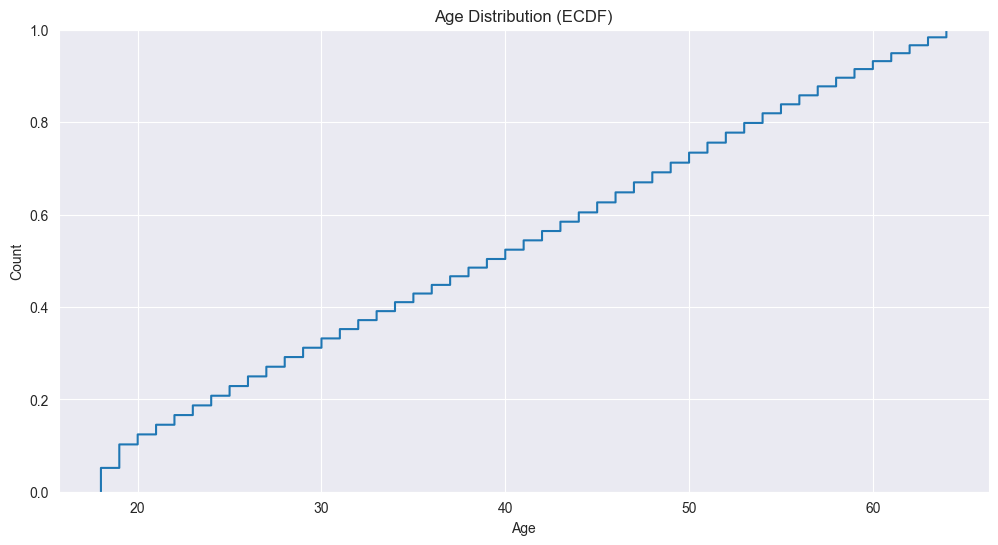

In [15]:
sns.ecdfplot(
    insurance_df.age,
)

plt.title('Age Distribution (ECDF)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## bmi 

In [16]:
insurance_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

C:\Users\erik1\AppData\Local\Temp\ipykernel_11612\2547493114.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


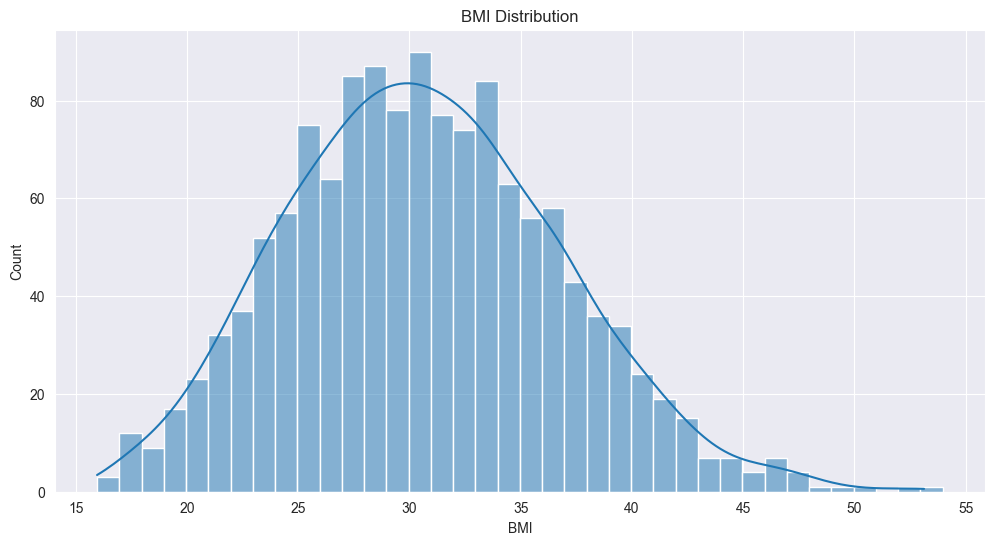

In [17]:
sns.histplot(
    insurance_df.bmi,
    # bins=20,
    binwidth=1,
    kde=True,
    palette='Set2',
)

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

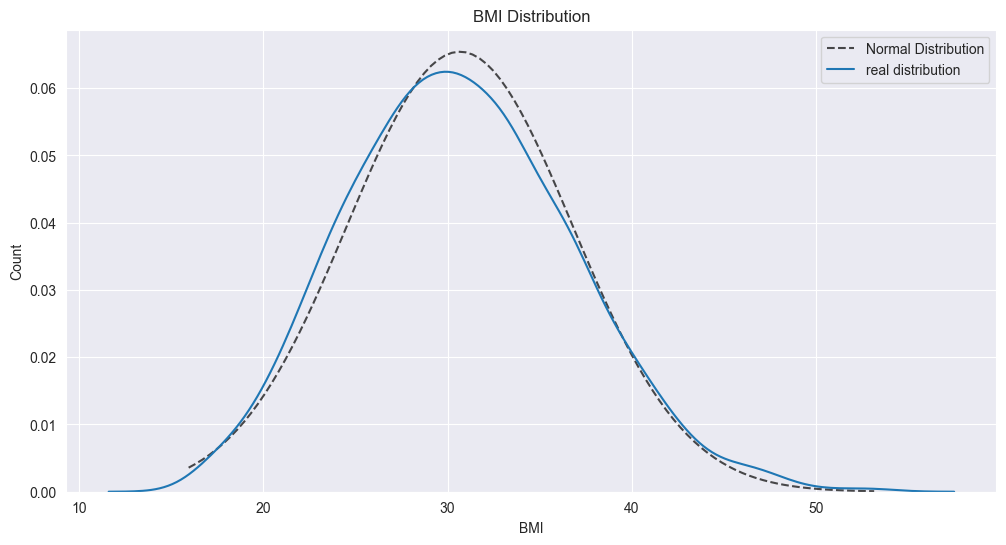

In [18]:
xs = np.linspace(insurance_df.bmi.min(), insurance_df.bmi.max(), 100)
ys = stats.norm.pdf(xs, insurance_df.bmi.mean(), insurance_df.bmi.std())

plt.plot(
    xs,
    ys,
    color='black',
    label='Normal Distribution',
    linestyle='--',
    alpha=0.7,
)

sns.kdeplot(
    insurance_df.bmi,
    label='real distribution',
)

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()

plt.show()

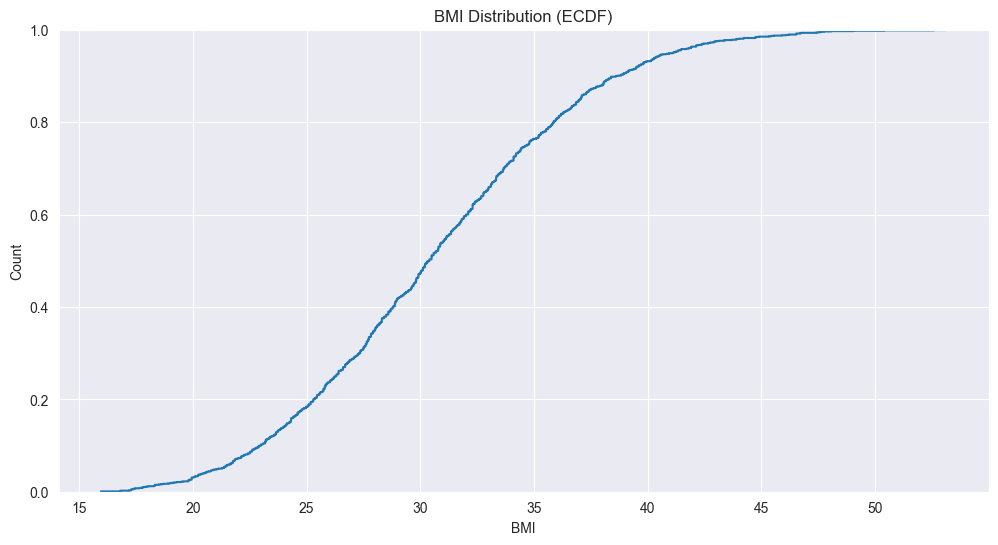

In [19]:
sns.ecdfplot(
    insurance_df.bmi,
)

plt.title('BMI Distribution (ECDF)')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

## charges

In [27]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoder', 'smoker_encoder', 'region_encoder'],
      dtype='object')

In [26]:
insurance_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

C:\Users\erik1\AppData\Local\Temp\ipykernel_11612\1956813265.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


<AxesSubplot: xlabel='charges', ylabel='Count'>

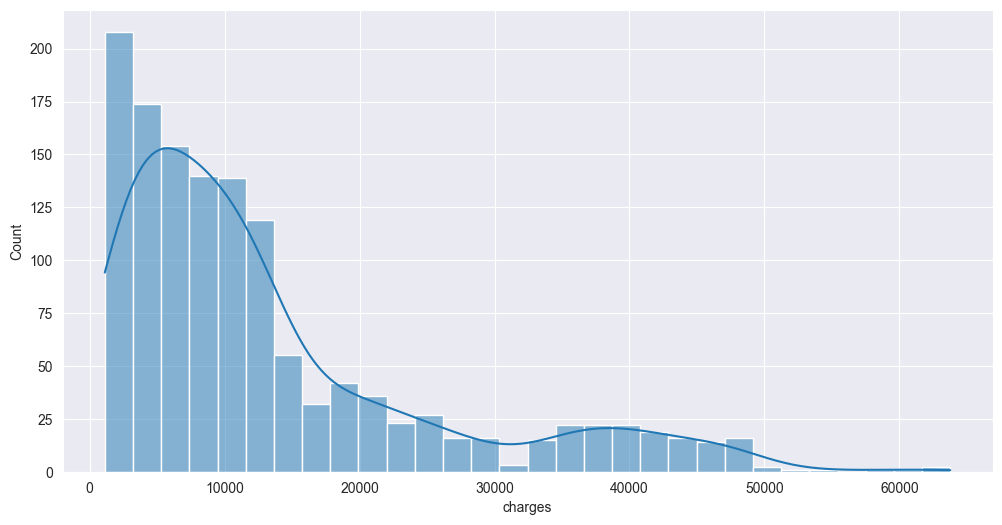

In [24]:
sns.histplot(
    insurance_df,
    x='charges',
    kde=True,
    palette='Set2',
)

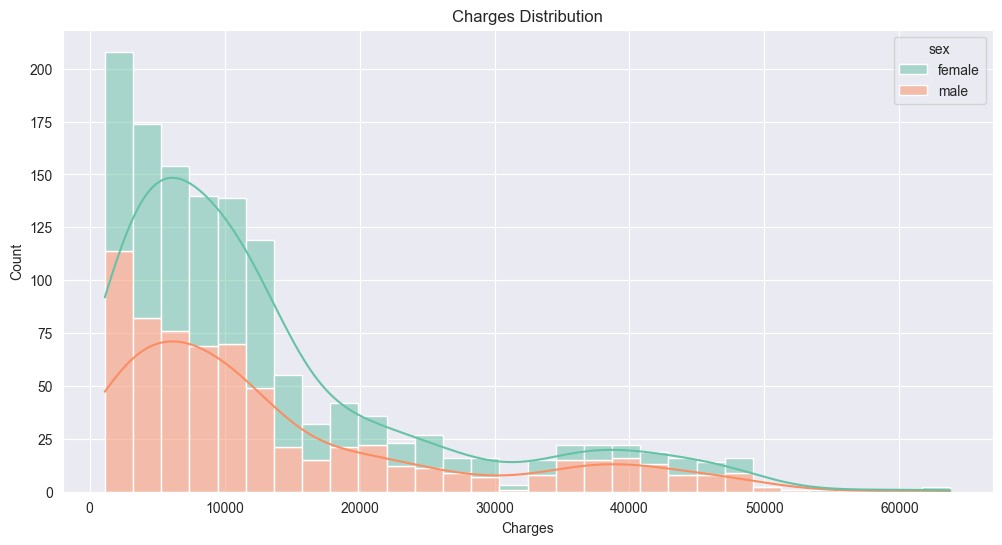

In [46]:
sns.histplot(
    insurance_df,
    x='charges',
    kde=True,
    palette='Set2',
    hue='sex',
    multiple='stack',
)

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


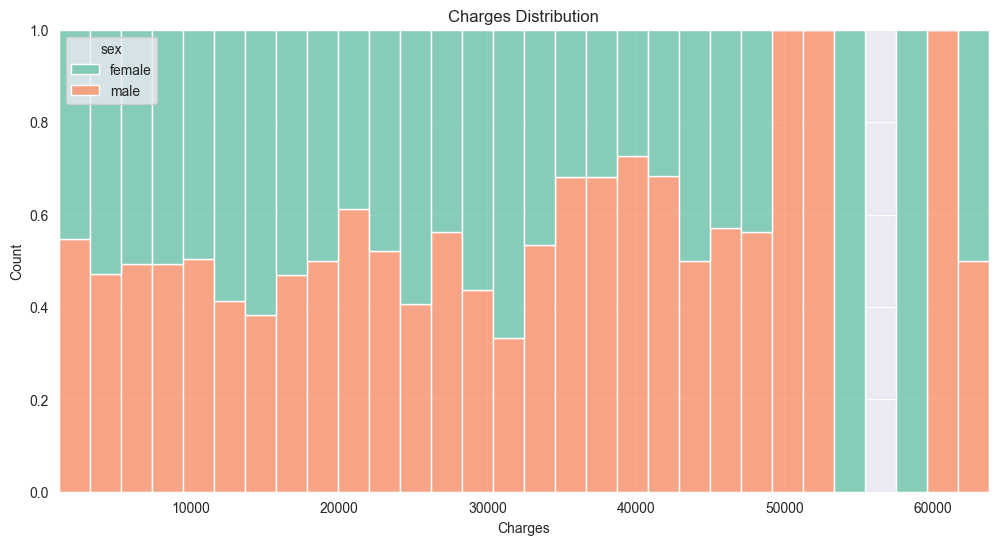

In [39]:
sns.histplot(
    insurance_df,
    x='charges',
    hue='sex',
    multiple='fill',
    palette='Set2',
)

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

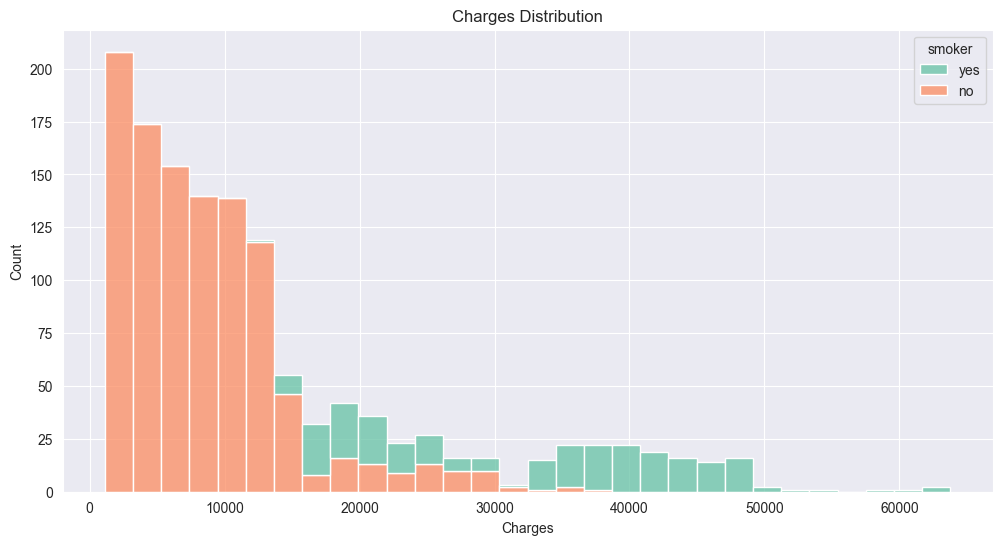

In [50]:
sns.histplot(
    insurance_df,
    x='charges',
    # kde=True,
    palette='Set2',
    hue='smoker',
    multiple='stack',
)

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


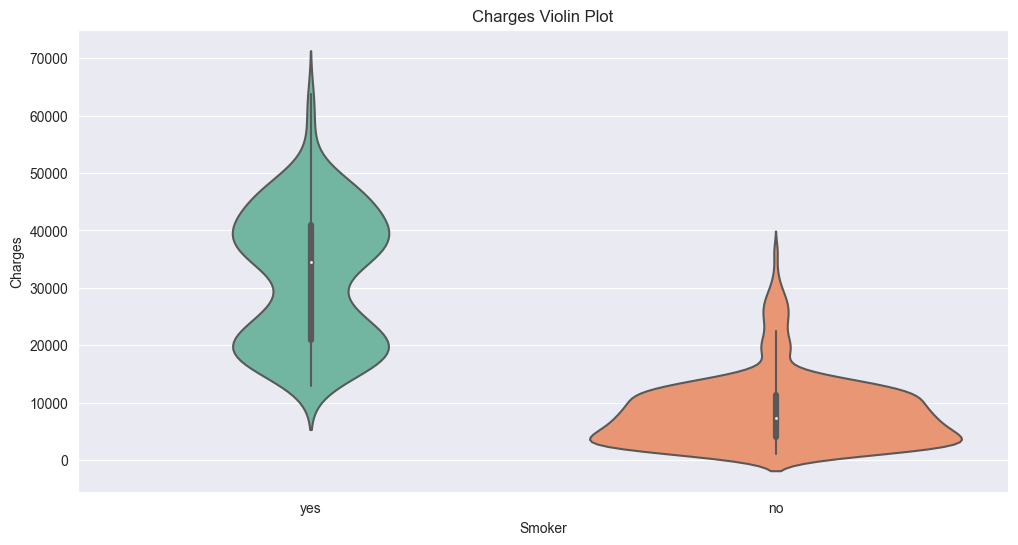

In [60]:
sns.violinplot(
    x='smoker',
    y='charges',
    data=insurance_df,
    palette='Set2',
)

plt.title('Charges Violin Plot')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

Si una persona fuma tiende a tener un mayor costo de seguro

## Children 

In [53]:
insurance_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

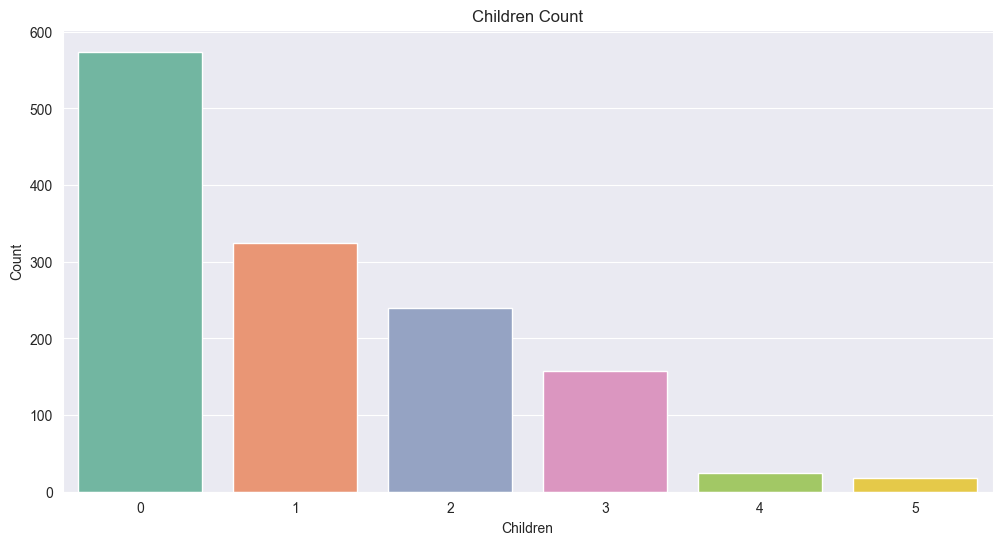

In [56]:
sns.countplot(
    insurance_df,
    x='children',
    palette='Set2',

)

plt.title('Children Count')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

## Region

In [66]:
insurance_df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

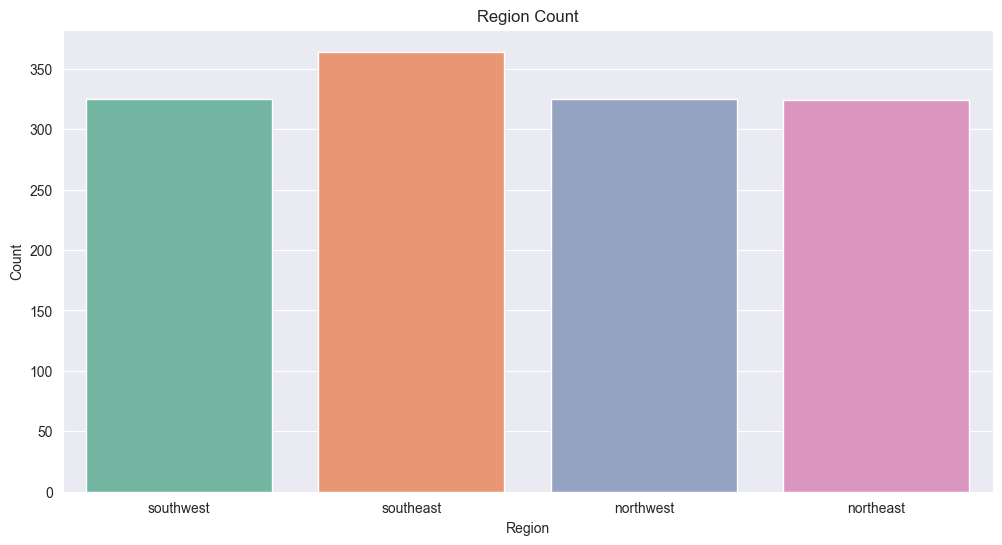

In [67]:
sns.countplot(
    insurance_df,
    x='region',
    palette='Set2',
)

plt.title('Region Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Analisis de Regresion Simple

In [89]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoder', 'smoker_encoder', 'region_encoder'],
      dtype='object')

In [65]:
insurance_df.corr()

C:\Users\erik1\AppData\Local\Temp\ipykernel_11612\1022999120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  insurance_df.corr()


,age,bmi,children,charges,sex_encoder,smoker_encoder,region_encoder
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.006208
sex_encoder,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,0.004588
smoker_encoder,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.002181
region_encoder,0.002127,0.157566,0.016569,-0.006208,0.004588,-0.002181,1.000000


In [99]:
model_1 = (
    smf.ols(
        formula = 'charges ~ age + C(smoker) + bmi + C(children) + C(region)',
        data = insurance_df,
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     365.3
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:20:03   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1326   BIC:                         2.718e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.198e+04    984.791    -12.162      0.000   -1.39e+04      -1e+04
C(smoker)[T.yes]        2.382e+04    412.798     57.714      0.000     2.3e+04    2.46e+04
C(children)[T.1]         388.7148    421.174      0.923      0.356    -437.525    1214.955
C(children)[T.2]        1635.2322    466.518      3.505      0.000     720.038    2550.426
C(children)[T.3]         962.9771    547.910      1.758      0.079    -111.888    2037.842
C(children)[T.4]        2938.6462   1238.558      2.373      0.018     508.898    5368.394
C(children)[T.5]        1106.4498   1455.335      0.760      0.447   -1748.560    3961.459
C(region)[T.northwest]  -379.4355    476.403     -0.796      0.426   -1314.022     555.151
C(region)[T.southeast] -1032.4343    478.982     -2.155      0.031   -1972.079     -92.790
C(region)[T.southwest]  -952.1616    477.996     -1.992      0.047   -1889.873     -14.450
age                      257.3046     11.907     21.609      0.000     233.946     280.663
bmi                      336.3885     28.571     11.774      0.000     280.339     392.438
==============================================================================
Omnibus:                      294.356   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.395
Skew:                           1.192   Prob(JB):                    3.65e-152
Kurtosis:                       5.613   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
model_2 = (
    smf.ols(
        formula = 'charges ~ age + C(smoker) + bmi + C(children) + C(region) + C(sex)',
        data = insurance_df,
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:25:06   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.193e+04    993.657    -12.003      0.000   -1.39e+04   -9977.861
C(smoker)[T.yes]        2.384e+04    414.139     57.557      0.000     2.3e+04    2.46e+04
C(children)[T.1]         390.9782    421.350      0.928      0.354    -435.608    1217.565
C(children)[T.2]        1635.7772    466.670      3.505      0.000     720.284    2551.270
C(children)[T.3]         964.3403    548.097      1.759      0.079    -110.893    2039.574
C(children)[T.4]        2947.3680   1239.163      2.379      0.018     516.432    5378.304
C(children)[T.5]        1116.0395   1456.015      0.767      0.444   -1740.307    3972.386
C(region)[T.northwest]  -380.0439    476.559     -0.797      0.425   -1314.936     554.848
C(region)[T.southeast] -1033.1375    479.139     -2.156      0.031   -1973.091     -93.184
C(region)[T.southwest]  -952.8878    478.153     -1.993      0.046   -1890.908     -14.867
C(sex)[T.male]          -128.1616    332.834     -0.385      0.700    -781.101     524.778
age                      257.1933     11.914     21.587      0.000     233.820     280.567
bmi                      336.9088     28.612     11.775      0.000     280.779     393.039
==============================================================================
Omnibus:                      293.990   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              695.789
Skew:                           1.191   Prob(JB):                    8.15e-152
Kurtosis:                       5.609   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""